# Stationarity Testing and Time Series Decomposition & Visualizations

In [1]:
# basic imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import datetime as dt

# visualizations
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
sns.set_theme(style='darkgrid', context='talk')

# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

# settings
import warnings 
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [2]:
# Load in cleaned data:
cleaned_df = pd.read_csv(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\data\cleaned_data.csv')

In [3]:
cleaned_df.head()

,order_id,date,item_code,quantity,unit_price,unit_cogs,country,item_name,style,name,group0,group1,group2,category,gender,age,sales_revenue,gross_profit,profit_margin,region
0,2000093388,2020-04-24,ZB00089178,1,5.829845,2.209302,Czech Republic,Team LIGA Socks CORE,70344113,Puma,Apparel,Socks,Football socks,football,unisex,adults,5.829845,3.620543,0.621036,Central Europe
1,1900182328,2019-11-04,ZB00089178,1,5.686483,0.000000,Slovakia,Team LIGA Socks CORE,70344113,Puma,Apparel,Socks,Football socks,football,unisex,adults,5.686483,5.686483,1.000000,Central Europe
2,1900186164,2019-11-10,ZB00089178,1,4.965116,2.373643,Czech Republic,Team LIGA Socks CORE,70344113,Puma,Apparel,Socks,Football socks,football,unisex,adults,4.965116,2.591473,0.521936,Central Europe
3,2000058563,2020-03-07,ZB00089178,1,4.965116,2.209302,Czech Republic,Team LIGA Socks CORE,70344113,Puma,Apparel,Socks,Football socks,football,unisex,adults,4.965116,2.755814,0.555035,Central Europe
4,2000297106,2020-11-24,ZB00089178,1,4.772868,2.364341,Czech Republic,Team LIGA Socks CORE,70344113,Puma,Apparel,Socks,Football socks,football,unisex,adults,4.772868,2.408527,0.504629,Central Europe


In [4]:
cleaned_df.dtypes

order_id           int64
date              object
item_code         object
quantity           int64
unit_price       float64
unit_cogs        float64
country           object
item_name         object
style             object
name              object
group0            object
group1            object
group2            object
category          object
gender            object
age               object
sales_revenue    float64
gross_profit     float64
profit_margin    float64
region            object
dtype: object

## Stationarity Testing

### Sales Revenue

In [5]:
# create revenue over time pandas series
sales_revenue = cleaned_df.groupby('date')['sales_revenue'].sum()

In [6]:
sales_revenue.head()

date
2019-06-01     4033.781335
2019-06-02       49.458527
2019-06-03     1323.282072
2019-06-04    68572.183865
2019-06-05    65144.273667
Name: sales_revenue, dtype: float64

In [7]:
sales_revenue.dtypes

dtype('float64')

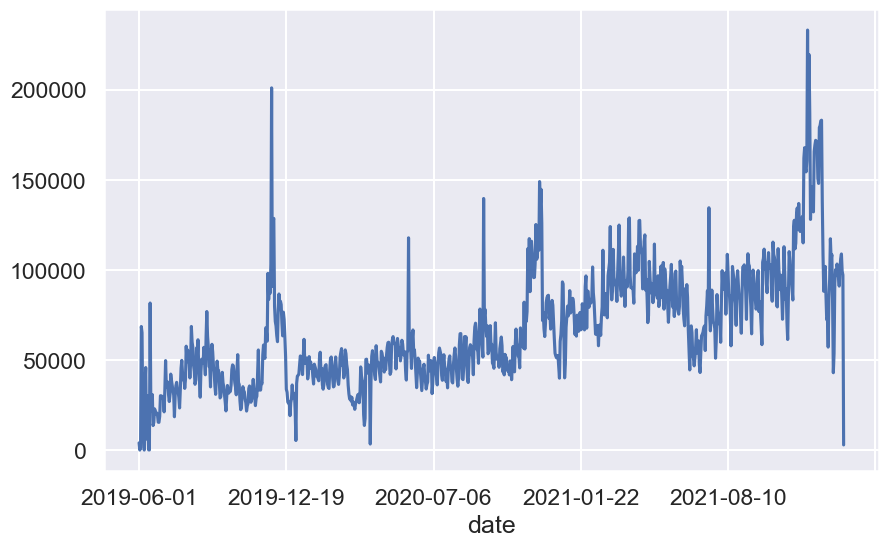

In [8]:
# set the figure size
plt.figure(figsize=(10, 6))

# plot the series
sales_revenue.plot()

# show the plot
plt.show()

Looking based of the plot we can classify the data as non-stationary

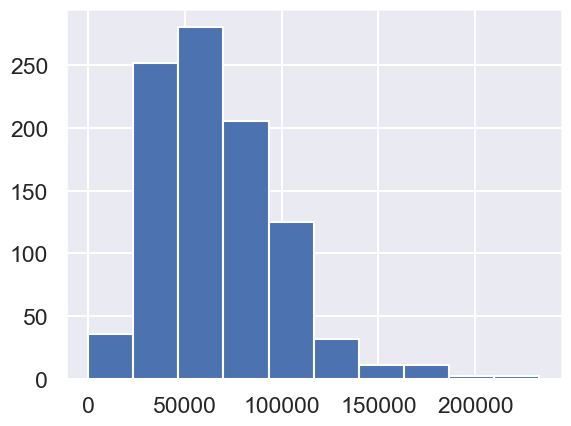

In [9]:
# create a histogram
sales_revenue.hist()
pyplot.show()

Running the plots a histogram of values from the time series. We clearly see the bell curve-like shape of the Gaussian distribution, perhaps with a longer right tail.

Next, we can split the time series into two contiguous sequences. We can then calculate the mean and variance of each group of numbers and compare the values.

In [10]:
X = sales_revenue.values
split = round(len(X) / 2) # splitting the data points into hald (365 / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%.2f, mean2=%.2f' % (mean1, mean2))
print('variance1=%.2f, variance2=%.2f' % (var1, var2))

mean1=45184.39, mean2=88097.44
variance1=347636287.81, variance2=810858717.30


The mean and variance statistics also indicate that the revenue over time data is non-stationary, as they differ significantly.

#### Augmented Dickey-Fuller test
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

* Create a function `'ADF_Stationarity_Test'` with the input parameters `timeseries` and `significance_level` which: 
    * prints the adfuller test results
    * prints the conclusion stating whether timeseries is stationary based on the siginificance level (input parameter of function)

In [11]:
# create ADF function:

def ADF_Stationarity_Test(timeseries, significance_level=0.05):
    """
    Perform Augmented Dickey-Fuller test to check stationarity of a time series
    
    Parameters
    ----------
    timeseries : array-like
        The time series to be tested for stationarity
    significance_level : float, optional
        The significance level for the ADF test. Default is 0.05.
    
    Returns
    -------
    None : prints the ADF test results and conclusion about the stationarity of the time series
    """
    # Perform ADF test
    result = adfuller(timeseries)
    
    # Print the ADF test results
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    
    # Check if the time series is stationary based on the p-value and significance level
    if result[1] <= significance_level:
        print(f'The time series is stationary at the {significance_level:.0%} significance level.')
    else:
        print(f'The time series is non-stationary at the {significance_level:.0%} significance level.')

In [12]:
# Apply the ADF_Stationarity_Test function to revenue_over_time series
ADF_Stationarity_Test(sales_revenue)

ADF Statistic: -3.3678157705950054
p-value: 0.012106199072657404
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568
The time series is stationary at the 5% significance level.


However, when we conduct the ADF test, the results indicate that the series is stationary. This demonstrates how relying solely on simple plot analysis can be misleading. In this case, we will defer to the results of the ADF test.

## Time Series Functions


In [13]:
# force 'date' column to datetime object:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

In [14]:
# Define a function to resample a time series data by a specified time period and aggregate by a measure
def resample_series(series, time_period='day', measure='revenue'):
    
    # Define a dictionary to convert time periods to the corresponding resample frequencies
    time_periods = {'day': 'D', 'week': 'W', 'month': 'M', 'year': 'Y'}
    
    # Define a dictionary to convert measure names to the corresponding column names in the series DataFrame
    measures = {'revenue': 'sales_revenue', 'gross': 'gross_profit', 'margin': 'profit_margin'}
    
    # Set the index of the DataFrame to the 'date' column and resample the data by the specified time period 
    # (e.g., 'D' for daily, 'W' for weekly, etc.), and aggregate the 'sales_revenue', 'gross_profit', or 'profit_margin'
    # column by summing the values within each time period
    series = series.set_index('date')[measures[measure]].resample(time_periods[time_period]).sum()
    
    # Convert the resampled series back to a DataFrame and reset the index to include the 'date' column
    series = pd.DataFrame(series).reset_index()
    
    return series

In [15]:
# Define a function to extract date features from a time series DataFrame
def create_date_features(timeseries_df):
    
    # Extract year, month, day, week of year, and weekday from the 'date' column using pandas datetime functions
    timeseries_df['year'] = timeseries_df['date'].dt.year
    timeseries_df['month'] = timeseries_df['date'].dt.month
    timeseries_df['day'] = timeseries_df['date'].dt.day
    timeseries_df['weekofyear'] = timeseries_df['date'].dt.isocalendar().week
    timeseries_df['weekday'] = timeseries_df['date'].dt.weekday + 1
    
    return timeseries_df

In [16]:
# Define a function to add lagged features to a time series DataFrame
def add_lagged_features(timeseries_df, num_lag):
    
    # Loop over a range of lags (from 1 to num_lag) and add columns to the DataFrame containing the values of the 
    # sales_revenue, gross_profit, or profit_margin column lagged by each specified amount
    for lag in range(1, num_lag+1):
        timeseries_df[f'lag_{lag}'] = timeseries_df.iloc[:,1].shift(lag)
        
    # Drop rows that contain NaN values (due to the lags shifting the values out of the DataFrame)
    timeseries_df = timeseries_df.iloc[num_lag: , :]
    
    return timeseries_df

## Decomposition 

In [17]:
timeseries_df = resample_series(cleaned_df, 'day', 'revenue').set_index('date')

In [18]:
timeseries_df.head()

,sales_revenue
date,
2019-06-01,4033.781335
2019-06-02,49.458527
2019-06-03,1323.282072
2019-06-04,68572.183865
2019-06-05,65144.273667


In [19]:
timeseries_df.shape

(959, 1)

#### Additive Decomp

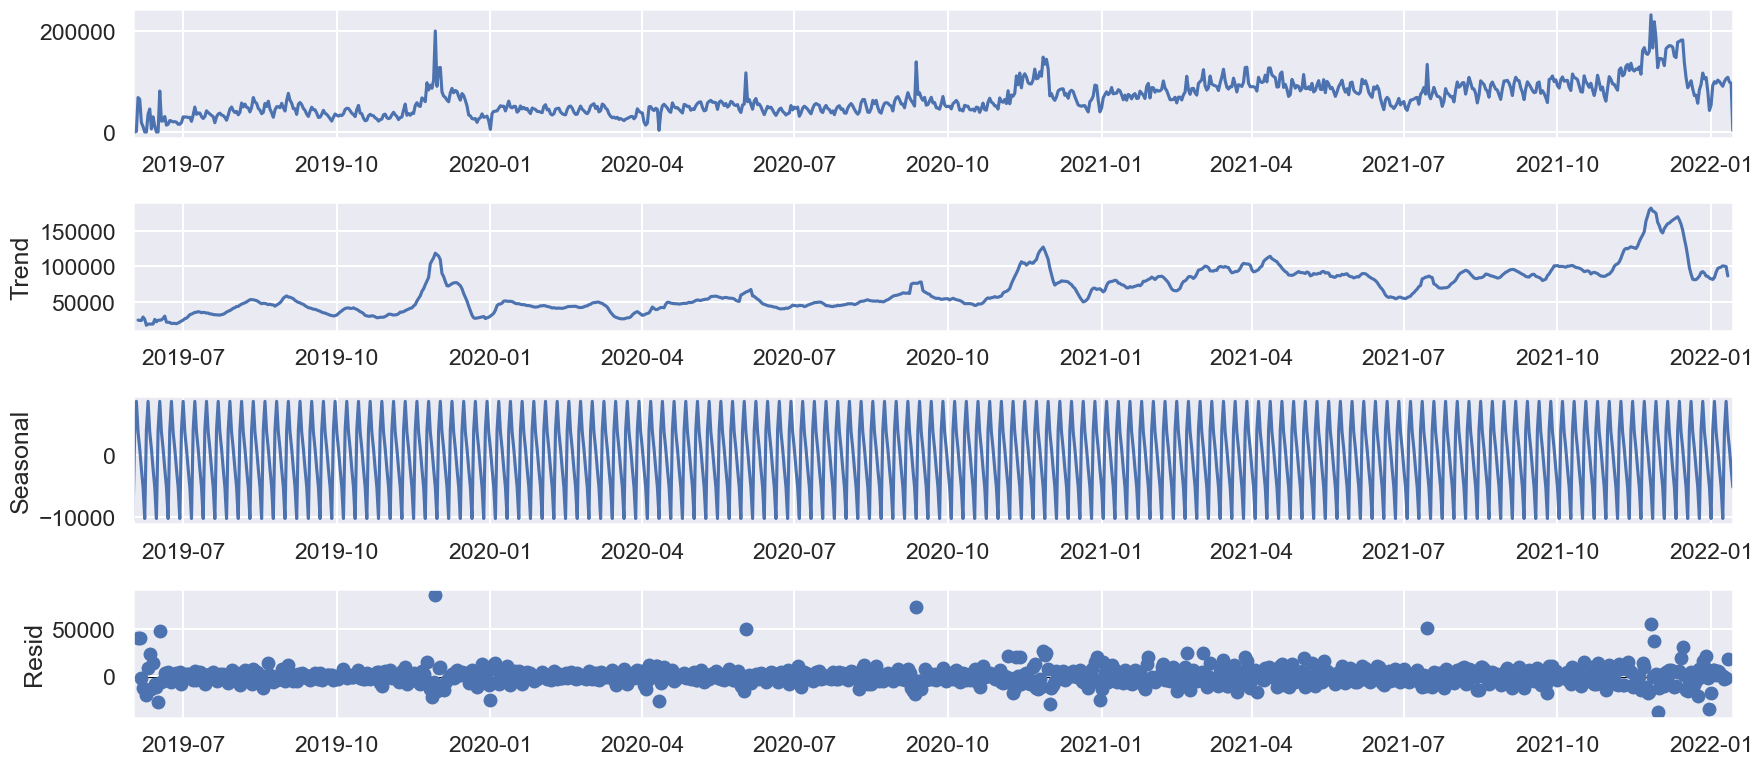

In [20]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(timeseries_df, model='additive')
fig = decomposition.plot()
plt.show()

We can see a slow and gradual increase in the trend line 

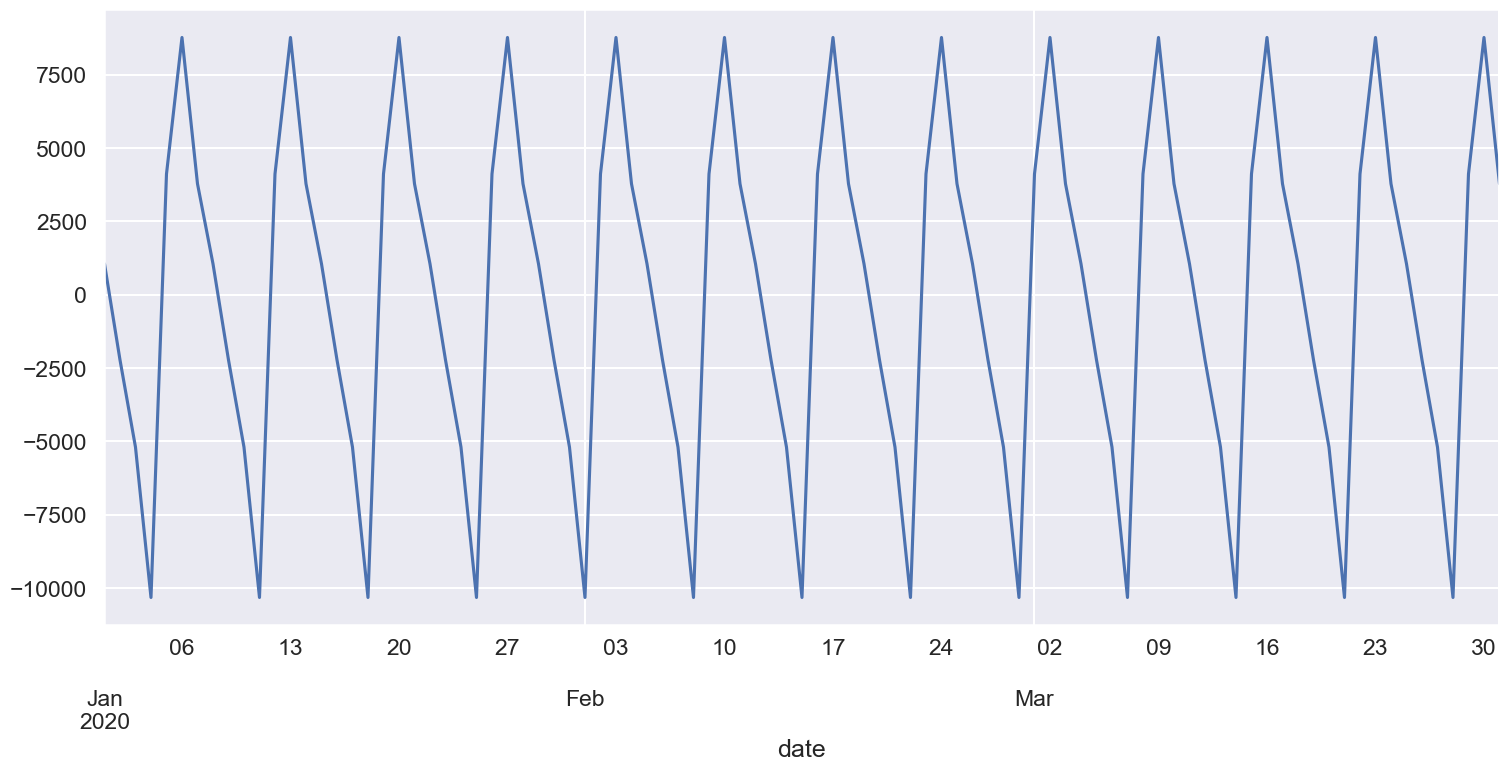

In [21]:
# show first quearter of 2020 for the seasonal decomposition:
decomposition.seasonal["2020":"2020-03"].plot();

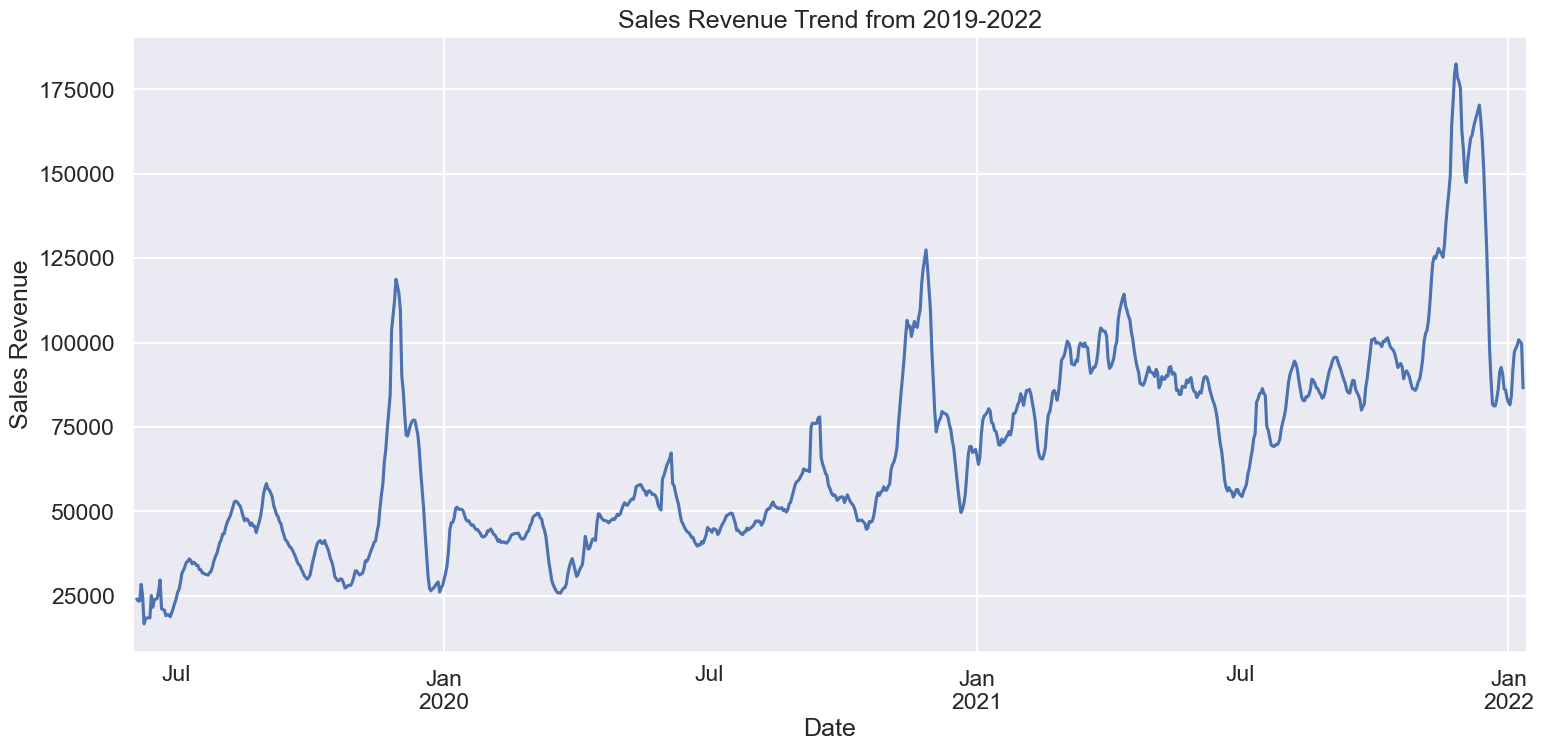

In [22]:
# plot revenue trend line for the past 4 years:
decomposition.trend.plot()
plt.title('Sales Revenue Trend from 2019-2022')
plt.ylabel('Sales Revenue')
plt.xlabel('Date')
plt.savefig(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\images/sales_revenue_trend.png')

#### Multiplicative Decomp

In [23]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(timeseries_df, model='multiplicative')
fig = decomposition.plot()
plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

Cannot use this multiplicative method since our series contains negative values therefore, we will use the additive method instead.

## Time Series Visualizations - Sales Revenue

#### Sales Revenue by Day

In [111]:
timeseries_df = resample_series(cleaned_df, 'day', 'revenue')

In [112]:
timeseries_df

,date,sales_revenue
0,2019-06-01,4033.781335
1,2019-06-02,49.458527
2,2019-06-03,1323.282072
3,2019-06-04,68572.183865
4,2019-06-05,65144.273667
...,...,...
954,2022-01-10,106185.035173
955,2022-01-11,108796.726653
956,2022-01-12,99231.427675
957,2022-01-13,97128.477211


In [113]:
timeseries_df.shape

(959, 2)

In [114]:
# save sales revenue as csv file in data folder:
timeseries_df.to_csv(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\data\sales_revenue_day.csv', index=False)

In [27]:
# use add_lagged_features function with 7 as the number of lags since we are woring with daily data:
lag_timeseries_day = add_lagged_features(timeseries_df, 7)

In [28]:
# show lagged timeseries dataframe:
lag_timeseries_day.head()

,date,sales_revenue,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
7,2019-06-08,37.927132,10750.820614,18783.094790,65144.273667,68572.183865,1323.282072,49.458527,4033.781335
8,2019-06-09,0.000000,37.927132,10750.820614,18783.094790,65144.273667,68572.183865,1323.282072,49.458527
9,2019-06-10,35543.475183,0.000000,37.927132,10750.820614,18783.094790,65144.273667,68572.183865,1323.282072
10,2019-06-11,45805.924673,35543.475183,0.000000,37.927132,10750.820614,18783.094790,65144.273667,68572.183865
11,2019-06-12,6162.000643,45805.924673,35543.475183,0.000000,37.927132,10750.820614,18783.094790,65144.273667


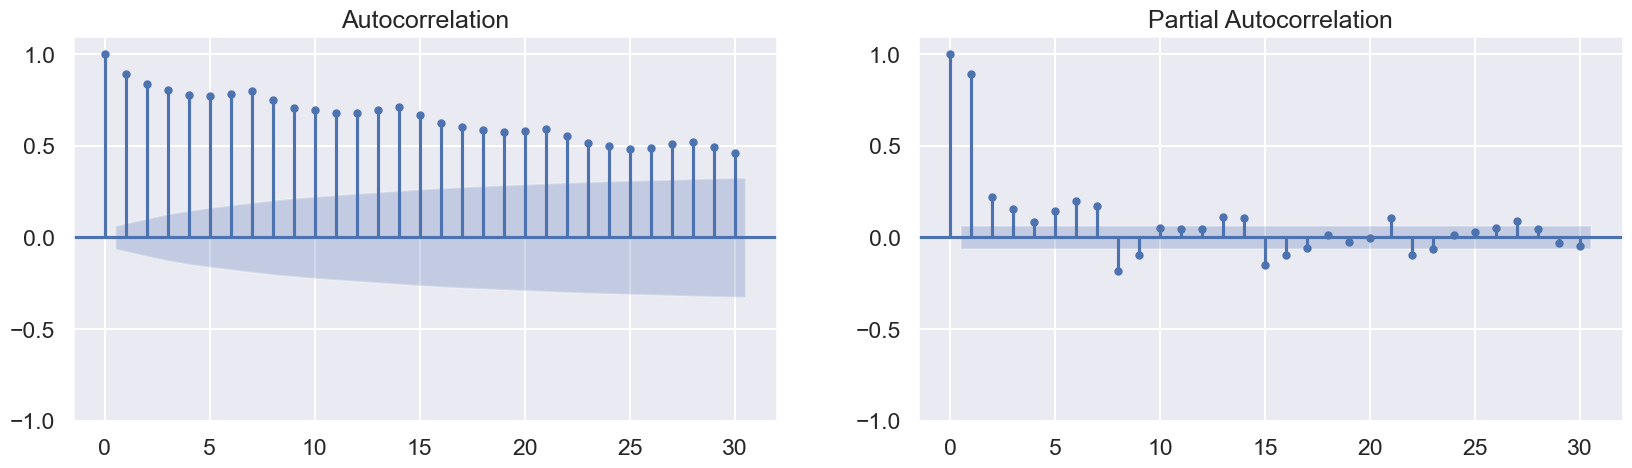

In [29]:
# plot auto and partial correlation:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_timeseries_day['sales_revenue'], lags=30, ax=ax[0])
plot_pacf(lag_timeseries_day['sales_revenue'], lags=30, ax=ax[1])

# increase the upper limit of the y-axis on the left plot by 10%
ax[0].set_ylim(ax[0].get_ylim()[0], ax[0].get_ylim()[1]+0.1*abs(ax[0].get_ylim()[1]))

# increase the upper limit of the y-axis on the right plot by 10%
ax[1].set_ylim(ax[1].get_ylim()[0], ax[1].get_ylim()[1]+0.1*abs(ax[1].get_ylim()[1]))

plt.show()

- Autocorrelation measures the relationship between a variable’s current value and its past values.
- An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of negative 1 represents a perfect negative correlation.
- Partial correlation, on the other hand, refers to the correlation between two variables after removing the effects of other variables. In time series analysis, partial correlation is used to measure the relationship between two time series while controlling for the effects of other time series

#### Sales Revenue by Week

In [33]:
timeseries_df = resample_series(cleaned_df, 'week', 'revenue')

In [34]:
timeseries_df.head()

,date,sales_revenue
0,2019-06-02,4083.239862
1,2019-06-09,164611.582140
2,2019-06-16,129654.622589
3,2019-06-23,208113.370792
4,2019-06-30,131865.611212


In [35]:
# save sales revenue as csv file in data folder:
timeseries_df.to_csv(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\data\sales_revenue_week.csv', index=False)

In [36]:
# use add_lagged_features function with 7 as the number of lags since we are woring with daily data:
lag_timeseries_week = add_lagged_features(timeseries_df, 7)

In [37]:
# show lagged timeseries dataframe:
lag_timeseries_week.head()

,date,sales_revenue,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
7,2019-07-21,229181.847470,248888.212772,202922.913450,131865.611212,208113.370792,129654.622589,164611.582140,4083.239862
8,2019-07-28,226027.903699,229181.847470,248888.212772,202922.913450,131865.611212,208113.370792,129654.622589,164611.582140
9,2019-08-04,291212.136551,226027.903699,229181.847470,248888.212772,202922.913450,131865.611212,208113.370792,129654.622589
10,2019-08-11,348983.273396,291212.136551,226027.903699,229181.847470,248888.212772,202922.913450,131865.611212,208113.370792
11,2019-08-18,351712.732047,348983.273396,291212.136551,226027.903699,229181.847470,248888.212772,202922.913450,131865.611212


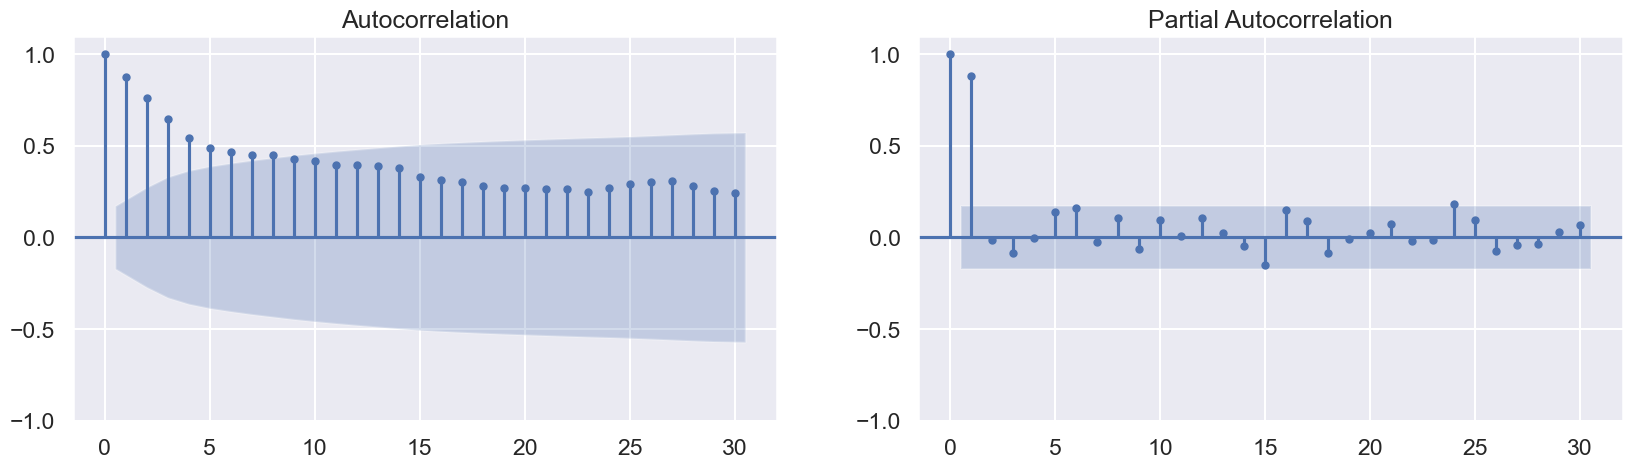

In [38]:
# plot auto and partial correlation:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_timeseries_week['sales_revenue'], lags=30, ax=ax[0])
plot_pacf(lag_timeseries_week['sales_revenue'], lags=30, ax=ax[1])

# increase the upper limit of the y-axis on the left plot by 10%
ax[0].set_ylim(ax[0].get_ylim()[0], ax[0].get_ylim()[1]+0.1*abs(ax[0].get_ylim()[1]))

# increase the upper limit of the y-axis on the right plot by 10%
ax[1].set_ylim(ax[1].get_ylim()[0], ax[1].get_ylim()[1]+0.1*abs(ax[1].get_ylim()[1]))

plt.show()

#### Sales Revenue by Month

In [44]:
timeseries_df = resample_series(cleaned_df, 'month', 'revenue')

In [45]:
timeseries_df.head()

,date,sales_revenue
0,2019-06-30,6.383284e+05
1,2019-07-31,1.044891e+06
2,2019-08-31,1.476252e+06
3,2019-09-30,1.283833e+06
4,2019-10-31,1.054651e+06


In [41]:
# save sales revenue as csv file in data folder:
timeseries_df.to_csv(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\data\sales_revenue_month.csv', index=False)

In [46]:
# use add_lagged_features function with 7 as the number of lags since we are woring with daily data:
lag_timeseries_month = add_lagged_features(timeseries_df, 7)

In [47]:
# show lagged timeseries dataframe:
lag_timeseries_month.head()

,date,sales_revenue,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
7,2020-01-31,1.382122e+06,1.771496e+06,1.718511e+06,1.054651e+06,1.283833e+06,1.476252e+06,1.044891e+06,6.383284e+05
8,2020-02-29,1.228829e+06,1.382122e+06,1.771496e+06,1.718511e+06,1.054651e+06,1.283833e+06,1.476252e+06,1.044891e+06
9,2020-03-31,1.151157e+06,1.228829e+06,1.382122e+06,1.771496e+06,1.718511e+06,1.054651e+06,1.283833e+06,1.476252e+06
10,2020-04-30,1.281860e+06,1.151157e+06,1.228829e+06,1.382122e+06,1.771496e+06,1.718511e+06,1.054651e+06,1.283833e+06
11,2020-05-31,1.665658e+06,1.281860e+06,1.151157e+06,1.228829e+06,1.382122e+06,1.771496e+06,1.718511e+06,1.054651e+06


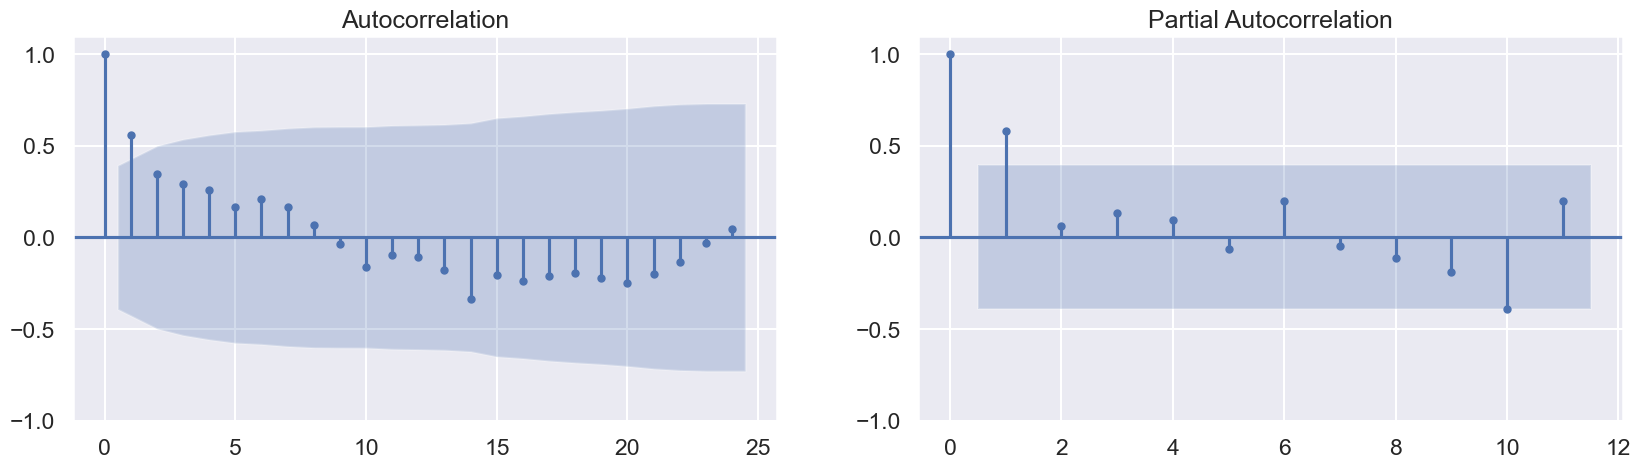

In [48]:
# plot auto and partial correlation (have to change lags to 24 since looking over 1 year:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_timeseries_month['sales_revenue'], lags=24, ax=ax[0])
plot_pacf(lag_timeseries_month['sales_revenue'], lags=11, ax=ax[1])

# increase the upper limit of the y-axis on the left plot by 10%
ax[0].set_ylim(ax[0].get_ylim()[0], ax[0].get_ylim()[1]+0.1*abs(ax[0].get_ylim()[1]))

# increase the upper limit of the y-axis on the right plot by 10%
ax[1].set_ylim(ax[1].get_ylim()[0], ax[1].get_ylim()[1]+0.1*abs(ax[1].get_ylim()[1]))

plt.show()

## Time Series Visualizations - Gross Profit

#### Gross Profit by Day

In [49]:
timeseries_df = resample_series(cleaned_df, 'day', 'gross')

In [50]:
timeseries_df.head()

,date,gross_profit
0,2019-06-01,1792.122420
1,2019-06-02,16.576744
2,2019-06-03,503.233622
3,2019-06-04,26337.262935
4,2019-06-05,44571.232970


In [51]:
# save gross profit as csv file in data folder:
timeseries_df.to_csv(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\data\gross_profit_day.csv', index=False)

In [52]:
# use add_lagged_features function with 7 as the number of lags since we are woring with daily data:
lag_timeseries_day = add_lagged_features(timeseries_df, 7)

In [53]:
# show lagged timeseries dataframe:
lag_timeseries_day.head()

,date,gross_profit,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
7,2019-06-08,4.285271,5479.352785,9612.600604,44571.232970,26337.262935,503.233622,16.576744,1792.122420
8,2019-06-09,0.000000,4.285271,5479.352785,9612.600604,44571.232970,26337.262935,503.233622,16.576744
9,2019-06-10,18668.863943,0.000000,4.285271,5479.352785,9612.600604,44571.232970,26337.262935,503.233622
10,2019-06-11,22170.337851,18668.863943,0.000000,4.285271,5479.352785,9612.600604,44571.232970,26337.262935
11,2019-06-12,3492.493666,22170.337851,18668.863943,0.000000,4.285271,5479.352785,9612.600604,44571.232970


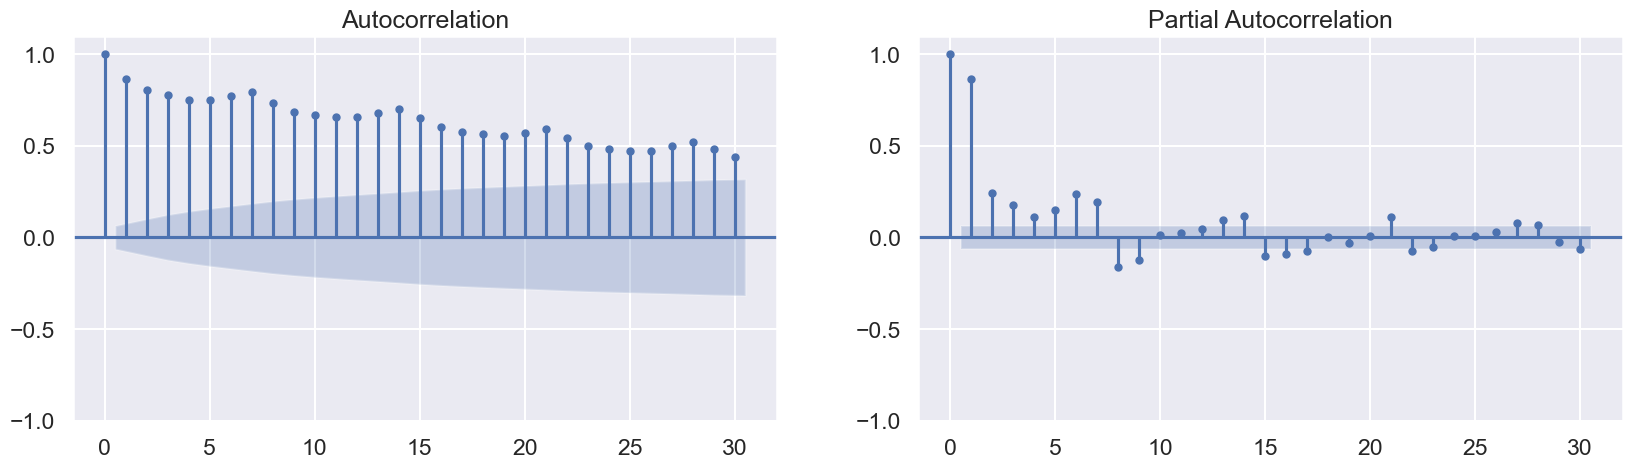

In [54]:
# plot auto and partial correlation:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_timeseries_day['gross_profit'], lags=30, ax=ax[0])
plot_pacf(lag_timeseries_day['gross_profit'], lags=30, ax=ax[1])

# increase the upper limit of the y-axis on the left plot by 10%
ax[0].set_ylim(ax[0].get_ylim()[0], ax[0].get_ylim()[1]+0.1*abs(ax[0].get_ylim()[1]))

# increase the upper limit of the y-axis on the right plot by 10%
ax[1].set_ylim(ax[1].get_ylim()[0], ax[1].get_ylim()[1]+0.1*abs(ax[1].get_ylim()[1]))

plt.show()

#### Gross Profit by Week

In [55]:
timeseries_df = resample_series(cleaned_df, 'week', 'gross')

In [56]:
timeseries_df.head()

,date,gross_profit
0,2019-06-02,1808.699164
1,2019-06-09,86507.968187
2,2019-06-16,67696.714837
3,2019-06-23,113879.348699
4,2019-06-30,66928.961212


In [57]:
# save gross profit as csv file in data folder:
timeseries_df.to_csv(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\data\gross_profit_week.csv', index=False)

In [58]:
# use add_lagged_features function with 7 as the number of lags since we are woring with daily data:
lag_timeseries_week = add_lagged_features(timeseries_df, 7)

In [59]:
# show lagged timeseries dataframe:
lag_timeseries_week.head()

,date,gross_profit,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
7,2019-07-21,100407.548633,112577.416260,90030.086318,66928.961212,113879.348699,67696.714837,86507.968187,1808.699164
8,2019-07-28,101038.052536,100407.548633,112577.416260,90030.086318,66928.961212,113879.348699,67696.714837,86507.968187
9,2019-08-04,129988.617946,101038.052536,100407.548633,112577.416260,90030.086318,66928.961212,113879.348699,67696.714837
10,2019-08-11,134492.010218,129988.617946,101038.052536,100407.548633,112577.416260,90030.086318,66928.961212,113879.348699
11,2019-08-18,123885.091350,134492.010218,129988.617946,101038.052536,100407.548633,112577.416260,90030.086318,66928.961212


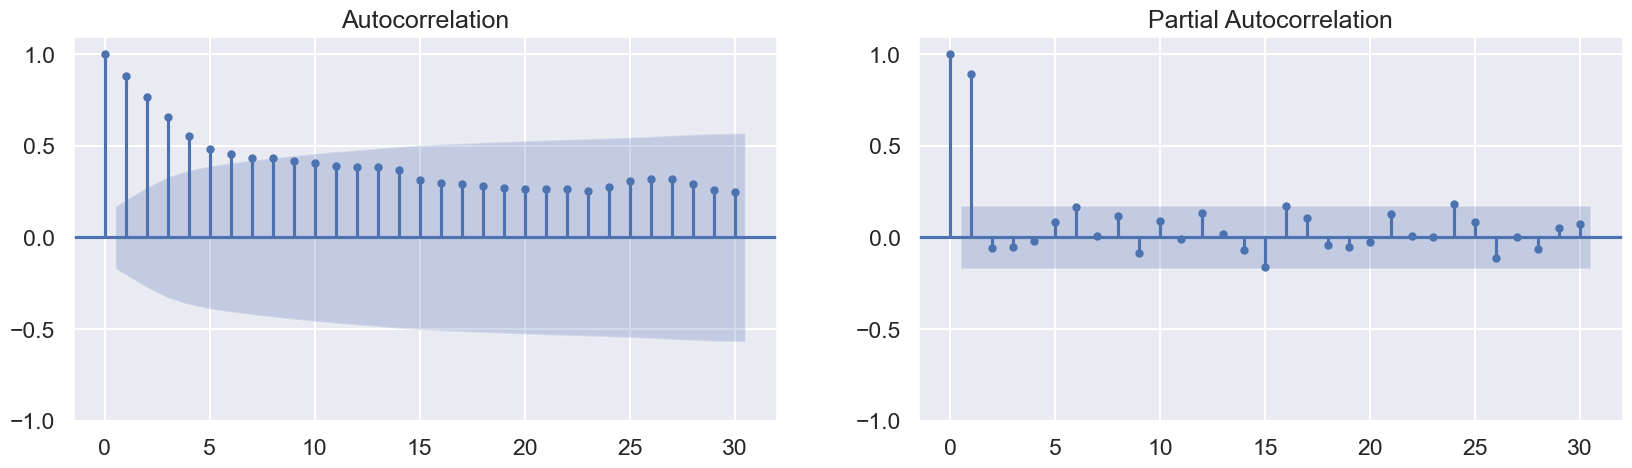

In [60]:
# plot auto and partial correlation:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_timeseries_week['gross_profit'], lags=30, ax=ax[0])
plot_pacf(lag_timeseries_week['gross_profit'], lags=30, ax=ax[1])

# increase the upper limit of the y-axis on the left plot by 10%
ax[0].set_ylim(ax[0].get_ylim()[0], ax[0].get_ylim()[1]+0.1*abs(ax[0].get_ylim()[1]))

# increase the upper limit of the y-axis on the right plot by 10%
ax[1].set_ylim(ax[1].get_ylim()[0], ax[1].get_ylim()[1]+0.1*abs(ax[1].get_ylim()[1]))

plt.show()

#### Gross Profit by Month

In [61]:
timeseries_df = resample_series(cleaned_df, 'month', 'gross')

In [62]:
timeseries_df.head()

,date,gross_profit
0,2019-06-30,336821.692099
1,2019-07-31,467400.370945
2,2019-08-31,550225.108962
3,2019-09-30,476987.839782
4,2019-10-31,402229.916442


In [63]:
# save gross profit as csv file in data folder:
timeseries_df.to_csv(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\data\gross_profit_month.csv', index=False)

In [64]:
# use add_lagged_features function with 7 as the number of lags since we are woring with daily data:
lag_timeseries_month = add_lagged_features(timeseries_df, 7)

In [65]:
# show lagged timeseries dataframe:
lag_timeseries_month.head()

,date,gross_profit,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
7,2020-01-31,501900.269527,654189.504981,608133.657160,402229.916442,476987.839782,550225.108962,467400.370945,336821.692099
8,2020-02-29,461360.674866,501900.269527,654189.504981,608133.657160,402229.916442,476987.839782,550225.108962,467400.370945
9,2020-03-31,437695.047533,461360.674866,501900.269527,654189.504981,608133.657160,402229.916442,476987.839782,550225.108962
10,2020-04-30,484027.409671,437695.047533,461360.674866,501900.269527,654189.504981,608133.657160,402229.916442,476987.839782
11,2020-05-31,676802.049357,484027.409671,437695.047533,461360.674866,501900.269527,654189.504981,608133.657160,402229.916442


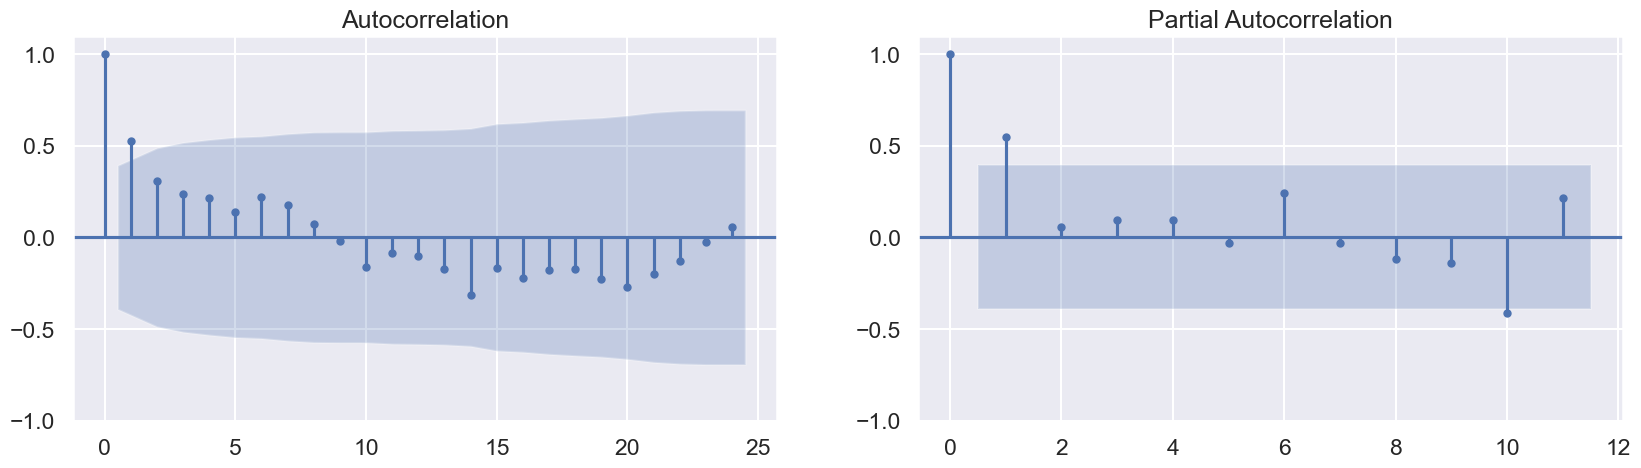

In [66]:
# plot auto and partial correlation (have to change lags to 24 since looking over 1 year:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_timeseries_month['gross_profit'], lags=24, ax=ax[0])
plot_pacf(lag_timeseries_month['gross_profit'], lags=11, ax=ax[1])

# increase the upper limit of the y-axis on the left plot by 10%
ax[0].set_ylim(ax[0].get_ylim()[0], ax[0].get_ylim()[1]+0.1*abs(ax[0].get_ylim()[1]))

# increase the upper limit of the y-axis on the right plot by 10%
ax[1].set_ylim(ax[1].get_ylim()[0], ax[1].get_ylim()[1]+0.1*abs(ax[1].get_ylim()[1]))

plt.show()

## Time Series Visualizations - Profit Margin

#### Profit Margin by Day

In [67]:
timeseries_df = resample_series(cleaned_df, 'day', 'margin')

In [68]:
timeseries_df.head()

,date,profit_margin
0,2019-06-01,59.432318
1,2019-06-02,0.716574
2,2019-06-03,13.105909
3,2019-06-04,584.174298
4,2019-06-05,1180.831100


In [69]:
# use add_lagged_features function with 7 as the number of lags since we are woring with daily data:
lag_timeseries_day = add_lagged_features(timeseries_df, 7)

In [70]:
# show lagged timeseries dataframe:
lag_timeseries_day.head()

,date,profit_margin,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
7,2019-06-08,0.322797,150.903416,257.088821,1180.831100,584.174298,13.105909,0.716574,59.432318
8,2019-06-09,0.000000,0.322797,150.903416,257.088821,1180.831100,584.174298,13.105909,0.716574
9,2019-06-10,452.178582,0.000000,0.322797,150.903416,257.088821,1180.831100,584.174298,13.105909
10,2019-06-11,547.591764,452.178582,0.000000,0.322797,150.903416,257.088821,1180.831100,584.174298
11,2019-06-12,81.470891,547.591764,452.178582,0.000000,0.322797,150.903416,257.088821,1180.831100


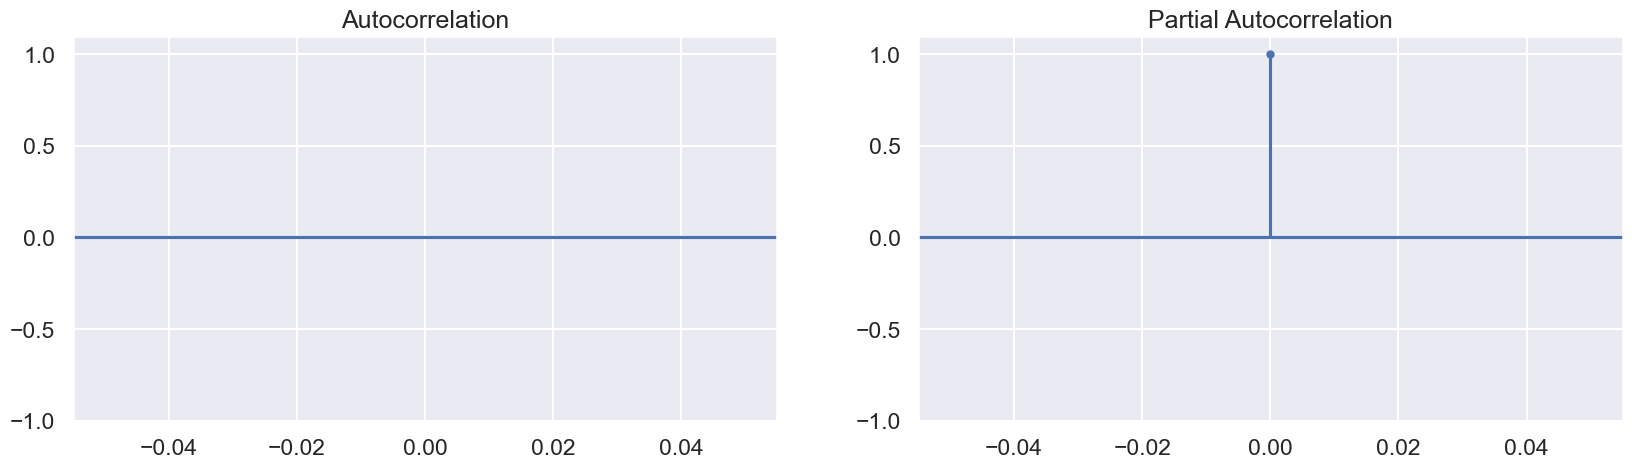

In [71]:
# plot auto and partial correlation (have to change lags to 24 since looking over 1 year:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_timeseries_day['profit_margin'], lags=30, ax=ax[0])
plot_pacf(lag_timeseries_day['profit_margin'], lags=30, ax=ax[1])

# increase the upper limit of the y-axis on the left plot by 10%
ax[0].set_ylim(ax[0].get_ylim()[0], ax[0].get_ylim()[1]+0.1*abs(ax[0].get_ylim()[1]))

# increase the upper limit of the y-axis on the right plot by 10%
ax[1].set_ylim(ax[1].get_ylim()[0], ax[1].get_ylim()[1]+0.1*abs(ax[1].get_ylim()[1]))

plt.show()

#### Profit Margin by Week

In [72]:
timeseries_df = resample_series(cleaned_df, 'week', 'margin')

In [73]:
timeseries_df.head()

,date,profit_margin
0,2019-06-02,60.148892
1,2019-06-09,2186.426341
2,2019-06-16,1663.252080
3,2019-06-23,2756.699026
4,2019-06-30,1698.796933


In [74]:
# use add_lagged_features function with 7 as the number of lags since we are woring with daily data:
lag_timeseries_week = add_lagged_features(timeseries_df, 7)

In [75]:
# show lagged timeseries dataframe:
lag_timeseries_week.head()

,date,profit_margin,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
7,2019-07-21,2381.581878,2855.595054,2373.717739,1698.796933,2756.699026,1663.252080,2186.426341,60.148892
8,2019-07-28,2304.625196,2381.581878,2855.595054,2373.717739,1698.796933,2756.699026,1663.252080,2186.426341
9,2019-08-04,2850.237050,2304.625196,2381.581878,2855.595054,2373.717739,1698.796933,2756.699026,1663.252080
10,2019-08-11,2900.212559,2850.237050,2304.625196,2381.581878,2855.595054,2373.717739,1698.796933,2756.699026
11,2019-08-18,2761.969298,2900.212559,2850.237050,2304.625196,2381.581878,2855.595054,2373.717739,1698.796933


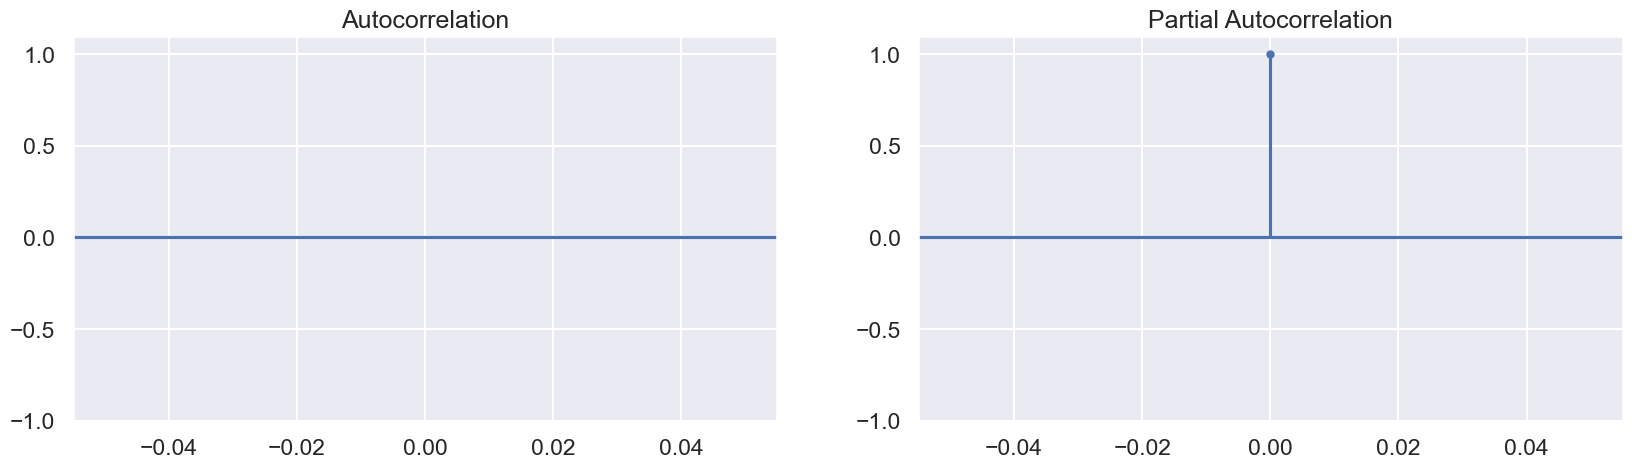

In [76]:
# plot auto and partial correlation (have to change lags to 24 since looking over 1 year:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_timeseries_week['profit_margin'], lags=30, ax=ax[0])
plot_pacf(lag_timeseries_week['profit_margin'], lags=30, ax=ax[1])

# increase the upper limit of the y-axis on the left plot by 10%
ax[0].set_ylim(ax[0].get_ylim()[0], ax[0].get_ylim()[1]+0.1*abs(ax[0].get_ylim()[1]))

# increase the upper limit of the y-axis on the right plot by 10%
ax[1].set_ylim(ax[1].get_ylim()[0], ax[1].get_ylim()[1]+0.1*abs(ax[1].get_ylim()[1]))

plt.show()

#### Profit Margin by Month

In [77]:
timeseries_df = resample_series(cleaned_df, 'month', 'margin')

In [78]:
timeseries_df.head()

,date,profit_margin
0,2019-06-30,8365.323273
1,2019-07-31,11338.403761
2,2019-08-31,12157.364323
3,2019-09-30,10752.280277
4,2019-10-31,8968.988903


In [79]:
# use add_lagged_features function with 7 as the number of lags since we are woring with daily data:
lag_timeseries_month= add_lagged_features(timeseries_df, 7)

In [80]:
# show lagged timeseries dataframe:
lag_timeseries_month.head()

,date,profit_margin,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
7,2020-01-31,11533.164952,NaN,13908.439598,8968.988903,10752.280277,12157.364323,11338.403761,8365.323273
8,2020-02-29,10150.857381,11533.164952,NaN,13908.439598,8968.988903,10752.280277,12157.364323,11338.403761
9,2020-03-31,9903.403832,10150.857381,11533.164952,NaN,13908.439598,8968.988903,10752.280277,12157.364323
10,2020-04-30,NaN,9903.403832,10150.857381,11533.164952,NaN,13908.439598,8968.988903,10752.280277
11,2020-05-31,NaN,NaN,9903.403832,10150.857381,11533.164952,NaN,13908.439598,8968.988903


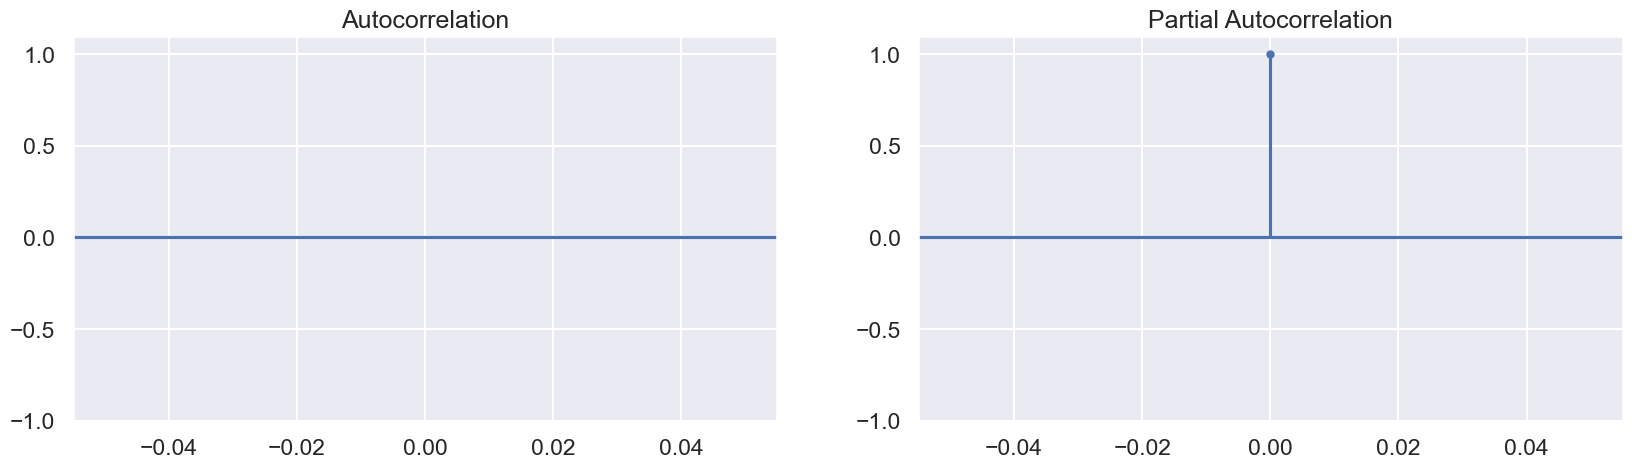

In [81]:
# plot auto and partial correlation (have to change lags to 24 since looking over 1 year:
fig, ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_timeseries_month['profit_margin'], lags=24, ax=ax[0])
plot_pacf(lag_timeseries_month['profit_margin'], lags=11, ax=ax[1])

# increase the upper limit of the y-axis on the left plot by 10%
ax[0].set_ylim(ax[0].get_ylim()[0], ax[0].get_ylim()[1]+0.1*abs(ax[0].get_ylim()[1]))

# increase the upper limit of the y-axis on the right plot by 10%
ax[1].set_ylim(ax[1].get_ylim()[0], ax[1].get_ylim()[1]+0.1*abs(ax[1].get_ylim()[1]))

plt.show()

## Time Series Visualizations Continued...

#### Average Sales Revenue by Day of Week

In [96]:
# cleaned_df time series data by day and aggregates the revenue values for each day.
timeseries_df = resample_series(cleaned_df, 'day', 'revenue')
timeseries_df = create_date_features(timeseries_df)
timeseries_df['weekday'] = timeseries_df['weekday'].replace({1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'})

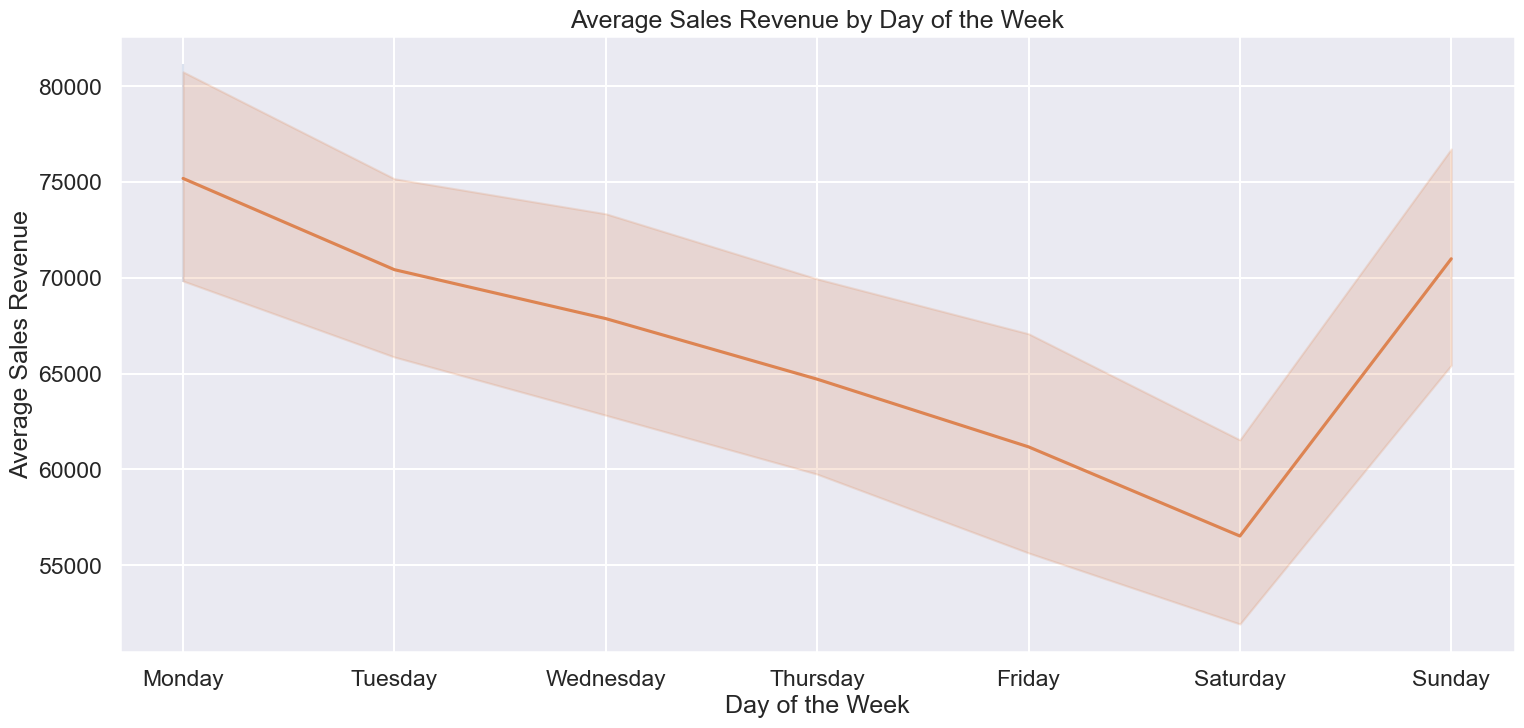

In [105]:
# plot average sales rev by day of week
first_monday = timeseries_df[timeseries_df['weekday'] == 'Monday'].index[0] # start plot from monday

sns.lineplot(x='weekday', y='sales_revenue', data=timeseries_df[timeseries_df['weekday'] == 'Monday'])
plot = sns.lineplot(x='weekday', y='sales_revenue', data=timeseries_df[first_monday:])

plot.set(title='Average Sales Revenue by Day of the Week', xlabel='Day of the Week', ylabel='Average Sales Revenue')

# save plot as an image
# plt.savefig(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\images/Average_Sales_Revenue_by_Day.png')

#### Average Sales Revenue by Week

In [ ]:
# cleaned_df time series data by week and aggregates the revenue averages for each week of the year
timeseries_df = resample_series(cleaned_df, 'week', 'revenue')
timeseries_df = create_date_features(timeseries_df).groupby('weekofyear').mean()

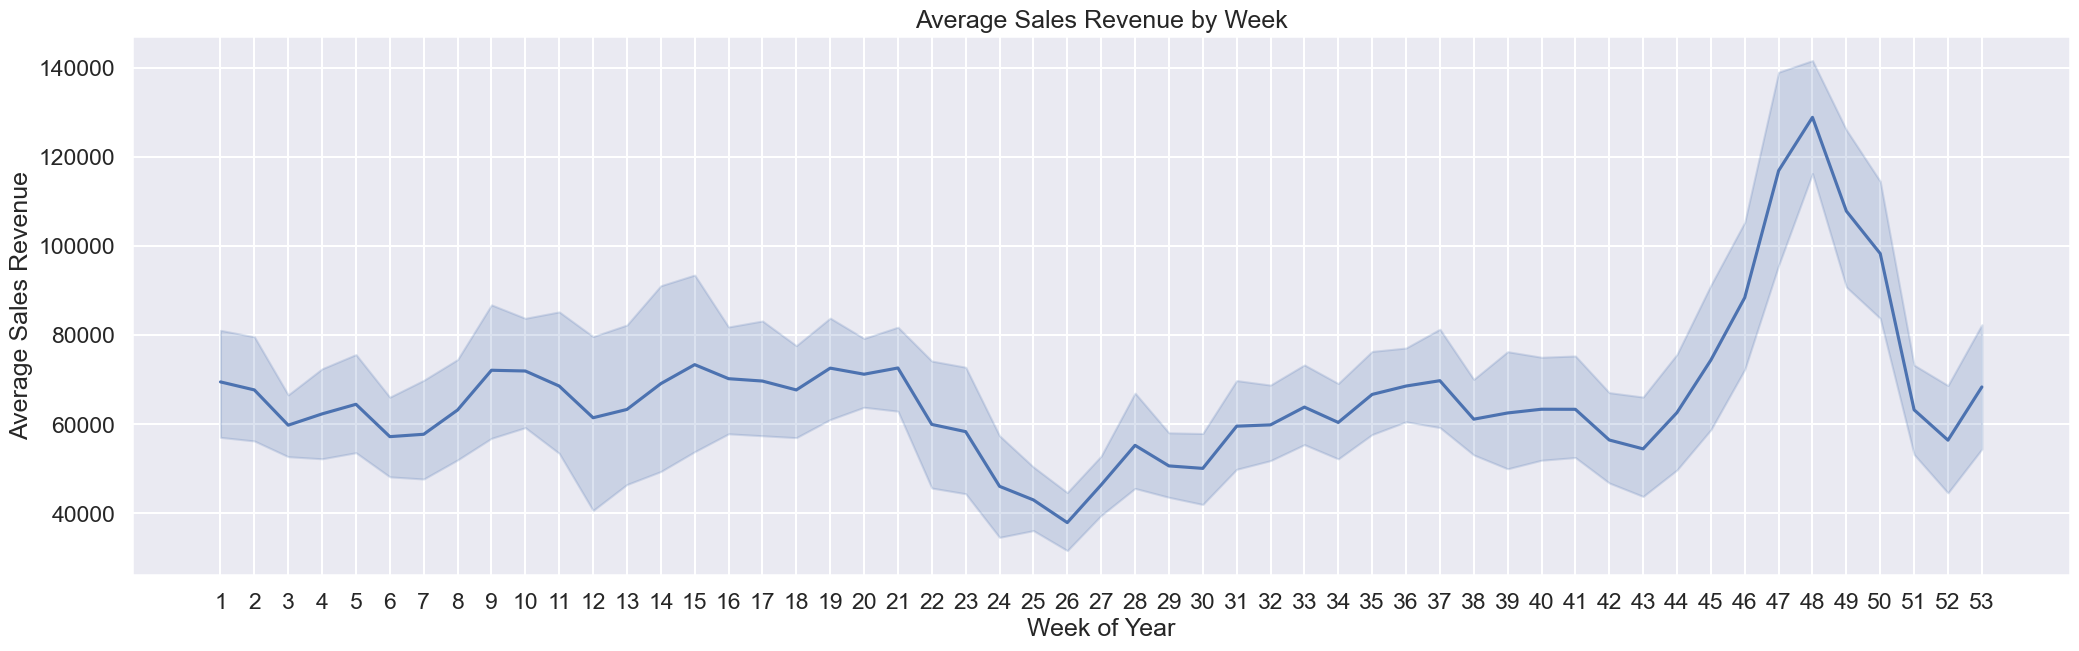

In [84]:
plt.figure(figsize=(25,7))
plot = sns.lineplot(x='weekofyear', y='sales_revenue', data=timeseries_df)
plot.xaxis.set_ticks([i for i in range(1,54)]) 
plot.set(title='Average Sales Revenue by Week', xlabel='Week of Year', ylabel='Average Sales Revenue')

# save plot as an image
# plt.savefig(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\images/Average_Sales_Revenue_by_Week.png')

#### Average Sales Revenue by Month

In [85]:
# cleaned_df time series data by month and aggregates the revenue averages for each month of the year
timeseries_df = resample_series(cleaned_df, 'month', 'revenue')
timeseries_df = create_date_features(timeseries_df).groupby('month').mean()

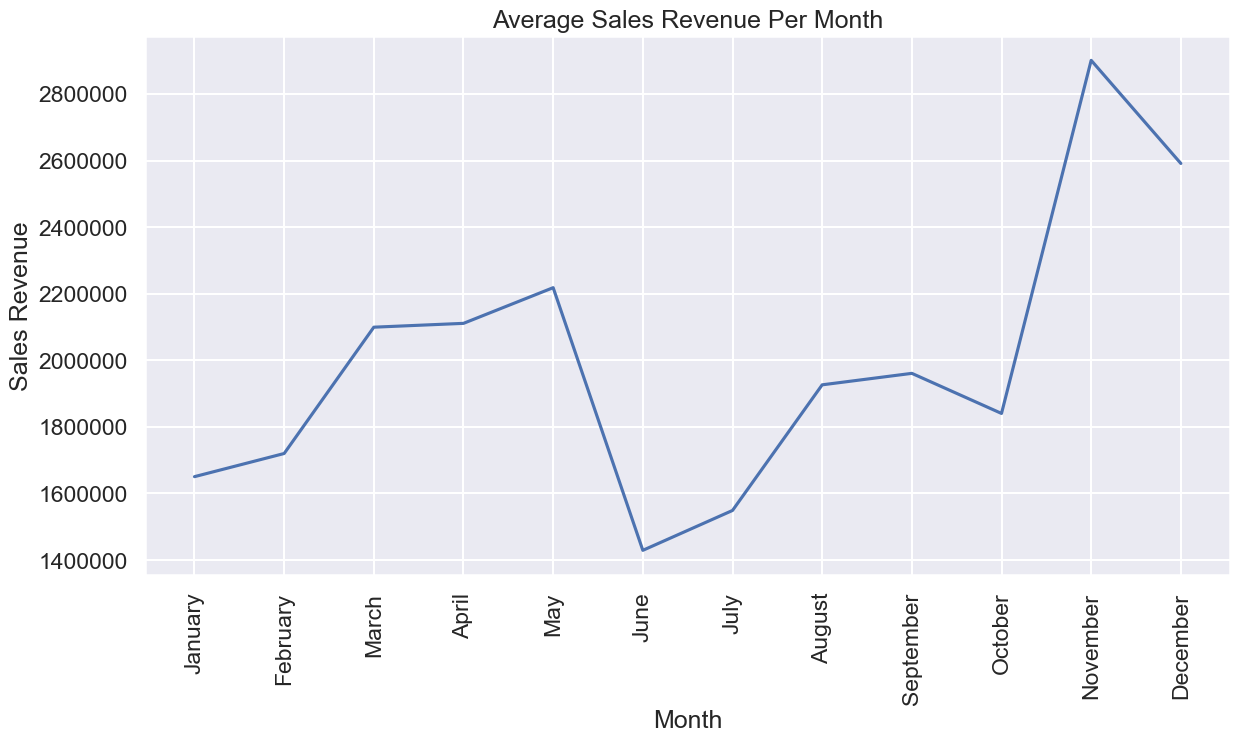

<Figure size 1800x800 with 0 Axes>

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(14,7))

# Plot line chart
plot = sns.lineplot(x='month', y='sales_revenue', data=timeseries_df)

# Set x-axis tick labels
plot.xaxis.set_ticks([i for i in range(1,13)])
plot.set_xticklabels(labels=['January', 'February', 'March', 'April', 'May', 'June', 
                             'July', 'August', 'September', 'October', 'November', 'December'])

# Format y-axis tick labels to show full digits
plot.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

# Set plot title and axis labels
plot.set(title='Average Sales Revenue Per Month', xlabel='Month', ylabel='Sales Revenue')

# Rotate x-axis tick labels
plt.xticks(rotation=90)

# Show plot
plt.show()

# save plot as an image
# plt.savefig(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\images/Average_Sales_Revenue_by_Month.png')

## Revenue by Columns

In [87]:
def column_select_revenue(df, column, category_list):
    # create an empty list to store dataframes
    df_list = []
    
    # loop through each category in the category list
    for category in category_list:
        # filter the dataframe to include only rows with the current category
        cur = df[df[column] == category]
        # resample the data to a monthly frequency and sum the sales revenue
        cur = cur.resample('M', on='date').sum().reset_index()
        # add a new column with the current category name
        cur[column] = category
        # append the resampled dataframe to the list of dataframes
        df_list.append(cur)
    
    # concatenate the list of dataframes into a single dataframe
    category_df = pd.concat(df_list).reset_index(drop=True)
    
    # create a line plot of sales revenue over time, with a separate line for each category
    ax = sns.lineplot(data=category_df, x="date", y="sales_revenue", hue=f"{column}")
    
    # set the y-axis format to plain notation (i.e., no scientific notation)
    ax.ticklabel_format(style='plain', axis='y')
    
    # return the concatenated dataframe
    return category_df

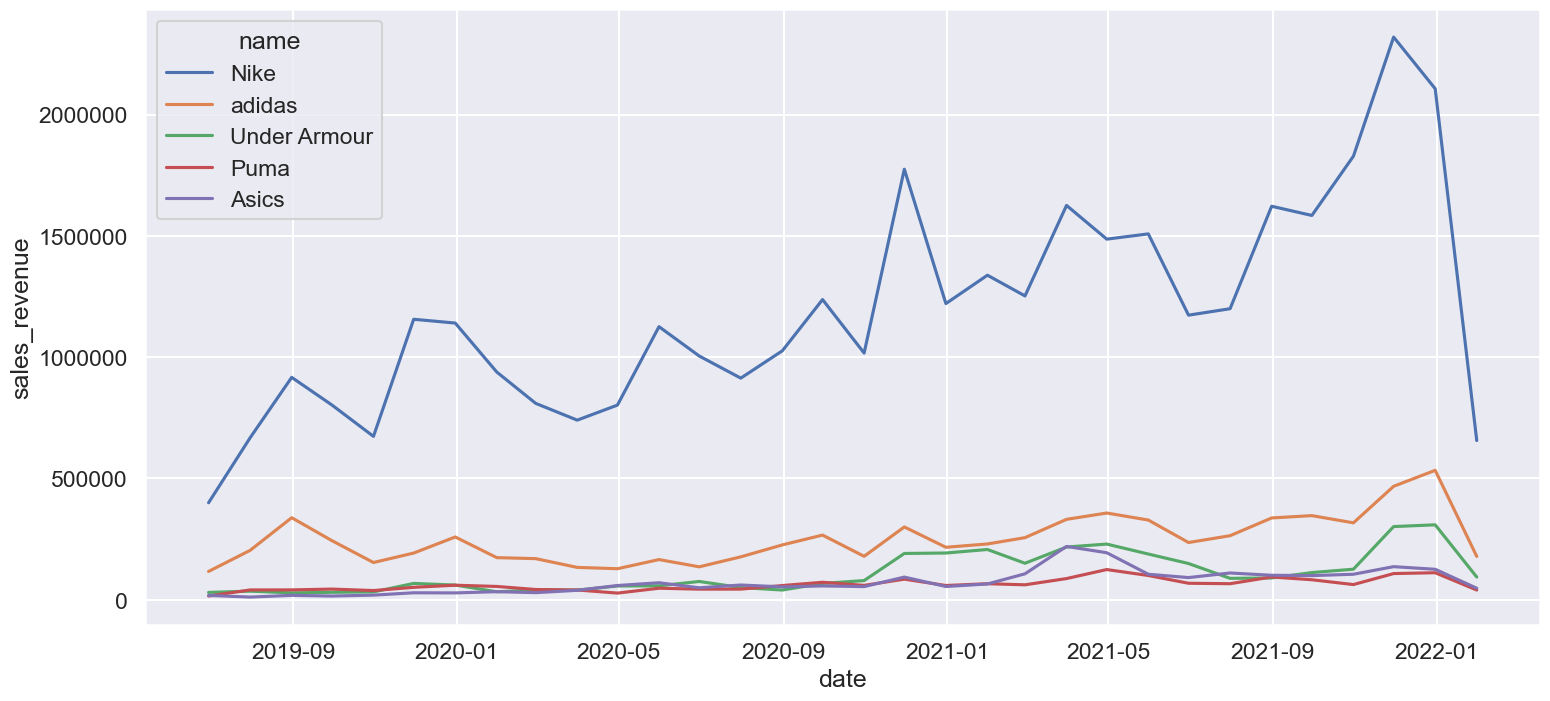

In [88]:
manufacturer_plot = column_select_revenue(cleaned_df, 'name', ['Nike', 'adidas', 'Under Armour', 'Puma', 'Asics'])

# save plot as an image
# plt.savefig(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\images/Revenue_by_Manufacturer.png')

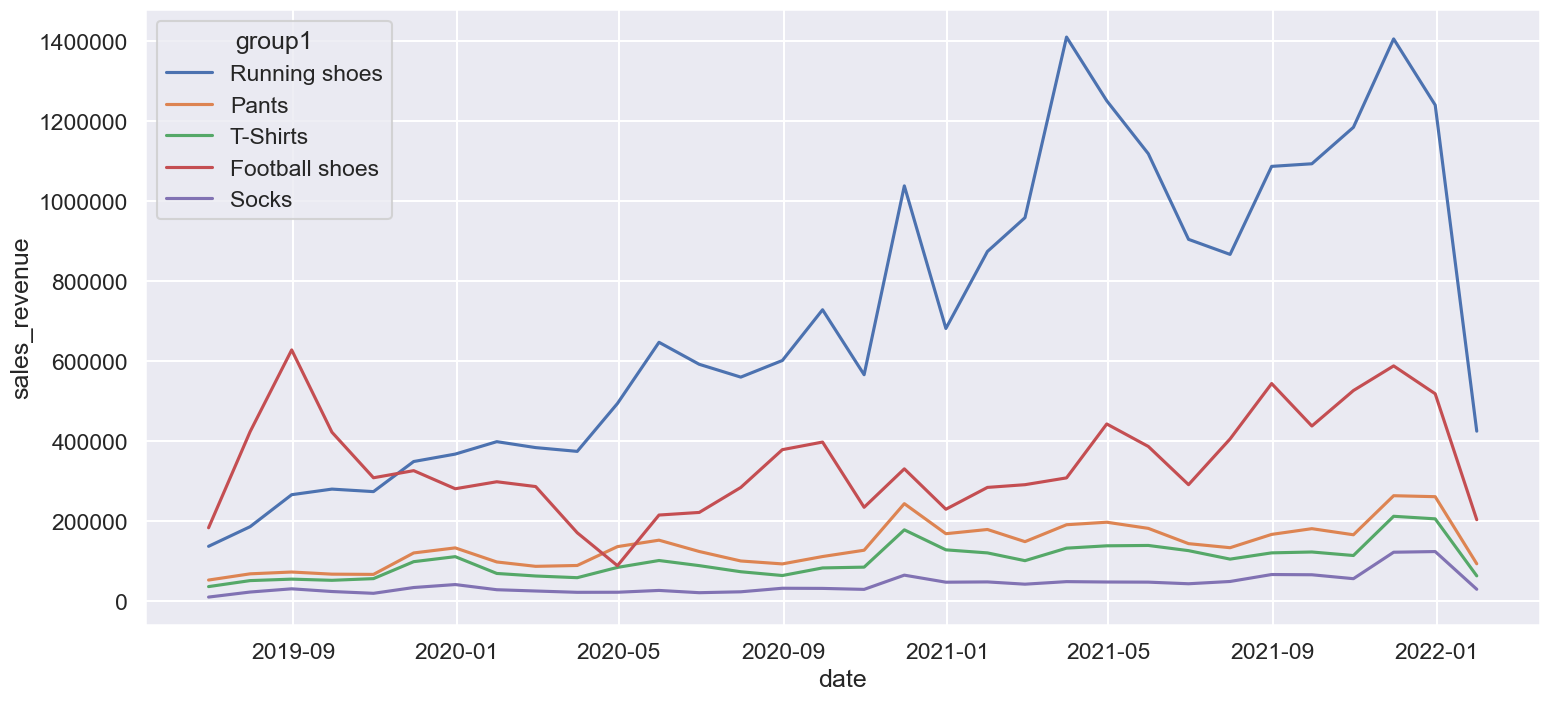

In [89]:
category1_plot = column_select_revenue(cleaned_df, 'group1', ['Running shoes', 'Pants', 'T-Shirts', 'Football shoes', 'Socks'])

# save plot as an image
# plt.savefig(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\images/Revenue_by_Category1.png')

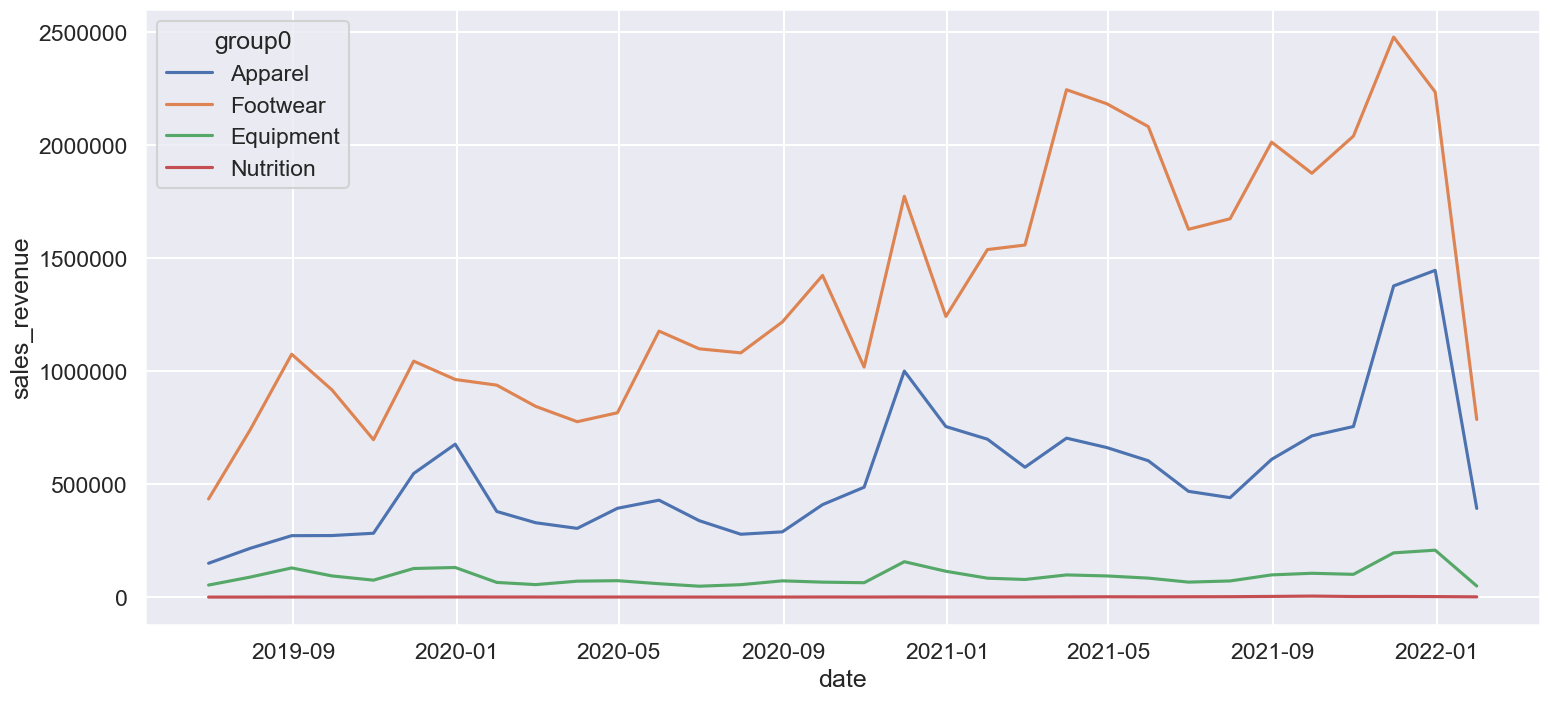

In [90]:
category0_plot = column_select_revenue(cleaned_df, 'group0', ['Apparel', 'Footwear', 'Equipment', 'Nutrition'])

# save plot as an image
# plt.savefig(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\images/Revenue_by_Category0.png')

## Revenue by Regions

In [91]:
unique_countries = cleaned_df['country'].unique()
print(unique_countries)

['Czech Republic' 'Slovakia' 'Romania' 'Hungary' 'Croatia' 'Spain'
 'Austria' 'Germany' 'France' 'Italy' 'Ireland' 'Sweden' 'Denmark'
 'Netherlands' 'Poland' 'Finland' 'Slovenia' 'Belgium' 'Portugal' nan
 'United Kingdom' 'Bulgaria']


In [92]:
# Create a dictionary that maps each country to its corresponding region
country_region_dict = {
    'Czech Republic': 'Central Europe',
    'Slovakia': 'Central Europe',
    'Romania': 'Eastern Europe',
    'Hungary': 'Central Europe',
    'Croatia': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Austria': 'Central Europe',
    'Germany': 'Central Europe',
    'France': 'Western Europe',
    'Italy': 'Southern Europe',
    'Ireland': 'Western Europe',
    'Sweden': 'Northern Europe',
    'Denmark': 'Northern Europe',
    'Netherlands': 'Western Europe',
    'Poland': 'Eastern Europe',
    'Finland': 'Northern Europe',
    'Slovenia': 'Southern Europe',
    'Belgium': 'Western Europe',
    'Portugal': 'Southern Europe',
    'United Kingdom': 'Western Europe',
    'Bulgaria': 'Eastern Europe'
}

In [93]:
# Add a new column to cleaned_df that indicates the region of each country
cleaned_df['region'] = cleaned_df['country'].map(country_region_dict)

# save csv file so we have these new features:
cleaned_df.to_csv(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\data\cleaned_data.csv', index=False)

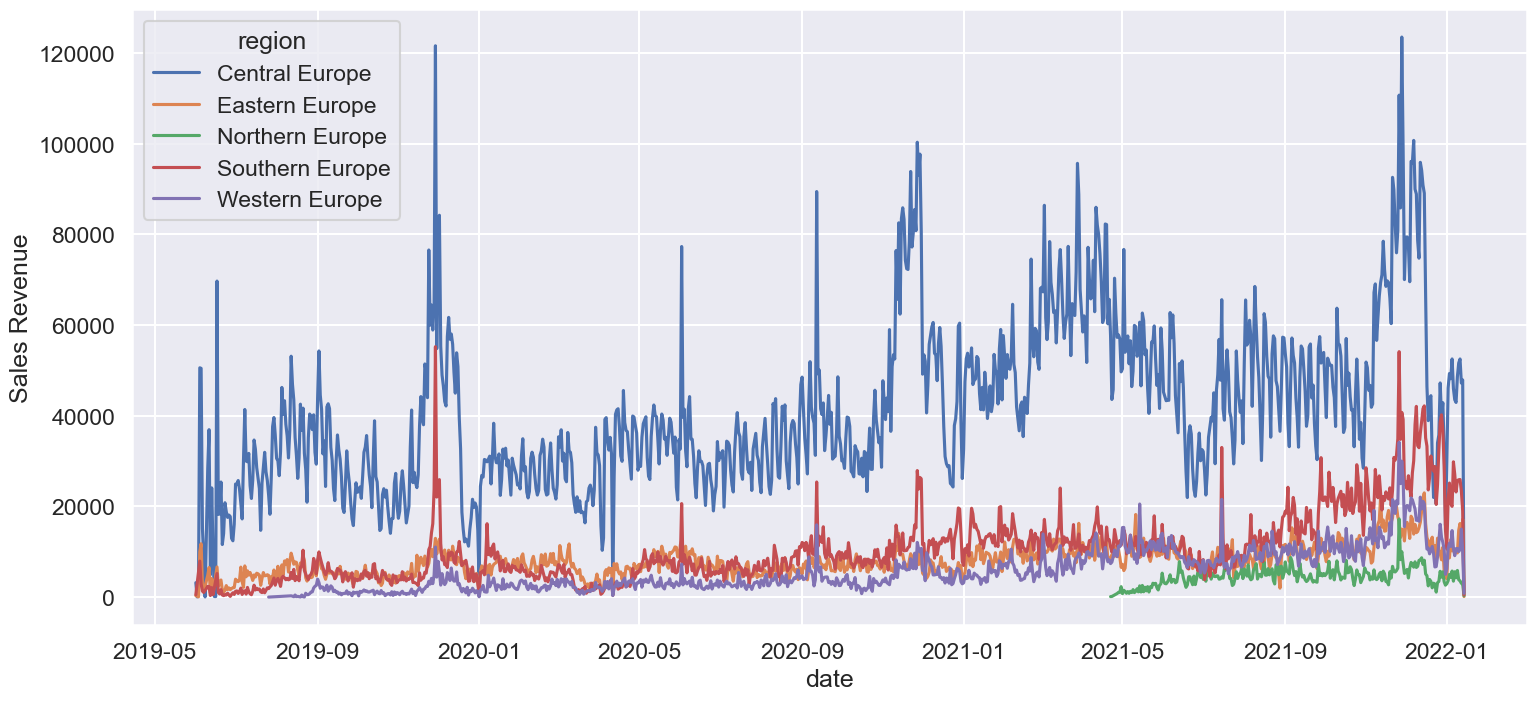

In [94]:
# Group the data by region and date
region_df = cleaned_df.groupby(['region', 'date'], as_index=False)['sales_revenue'].sum()

# Create a line plot for each region
sns.lineplot(data=region_df, x='date', y='sales_revenue', hue='region')
plt.ylabel('Sales Revenue')

# save plot as an image
# plt.savefig(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\images/Revenue_by_Region.png')

## Revenue by 10 Countries

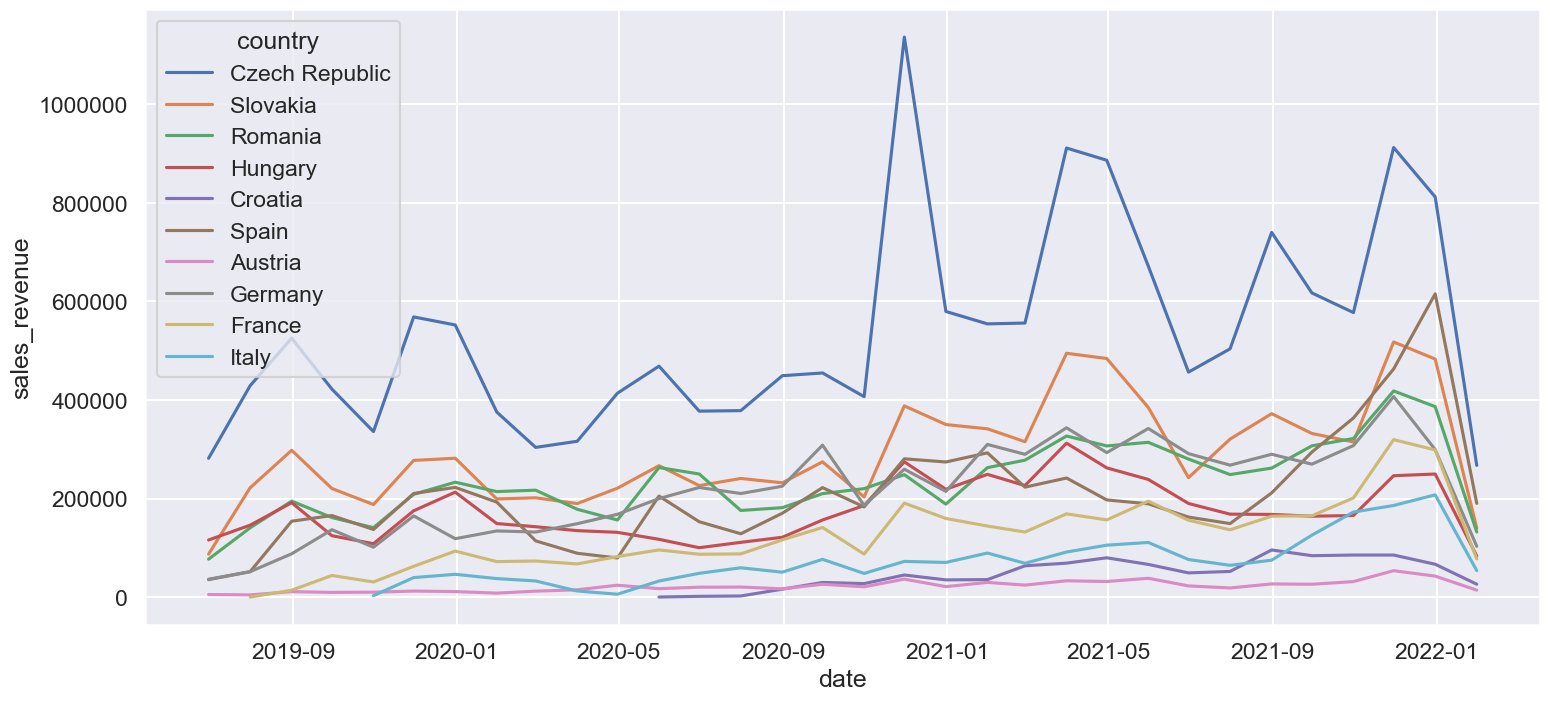

In [95]:
# Displaying first 10 countries for graph readability
countries = ['Czech Republic', 'Slovakia', 'Romania', 'Hungary', 'Croatia', 'Spain', 'Austria', 'Germany', 'France', 'Italy'] #, 'Ireland', 'Sweden', 'Denmark', 'Netherlands', 'Poland', 'Finland', 'Slovenia', 'Belgium', 'Portugal', 'United Kingdom', 'Bulgaria']

country_plot = column_select_revenue(cleaned_df, 'country', countries)

# save plot as an image
# plt.savefig(r'C:\Users\Jagvir Dhesi\lighthouselabs\projects\demand-prediction-project\images/Revenue_by_Countries.png')